# Image Processing lab: Rgb to indexed image

## Import Libraries 

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from skimage.color import rgb2gray, label2rgb
from skimage import io, transform

## Implement function rgb2ind

In [2]:
def rgb2ind(rgb_image, n_colors):
    
    # Reshape the RGB image into a 2D array of pixels
    pixels = rgb_image.reshape((-1, 3))

    # Apply K-means clustering to the pixel data
    kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(pixels)

    # colormap variable contains the RGB values of the representative colors of the imag
    colormap = kmeans.cluster_centers_
    
    # labels variable contains the index of the cluster (color) that each pixel belongs to.
    labels = kmeans.labels_

    # Reshape the label data back into the original image shape
    #indexed_image = labels.reshape(rgb_image.shape[:2])
    height, width, _ = rgb_image.shape
    indexed_image = labels.reshape(height, width)

    return indexed_image, colormap


## Load the rgb image using skimage

In [3]:
rgb_image = io.imread('images/peacock.jpeg')

## Reshape the image to be 128 * 128 using transform.resize( ) in skimage

In [4]:
rgb_image = transform.resize(rgb_image, (128, 128))

## Convert the RGB image to an indexed image with 16 colors

In [5]:
n_colors = 16
indexed_image, colormap = rgb2ind(rgb_image, n_colors)

## Display the original image, indexed image, and histogram

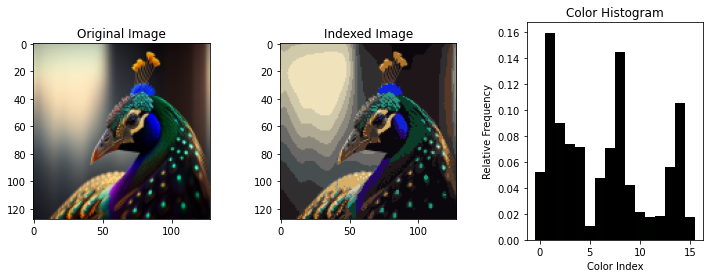

In [6]:
# Compute the histogram of the indexed image and normalize it by the total number of pixels
histogram, bins = np.histogram(indexed_image, bins=np.arange(n_colors+1), density=True)

# Create a colormap from the color values in the colormap array
cmap = ListedColormap(colormap/255)

# Display the original image, indexed image, and histogram
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

ax[0].imshow(rgb_image)
ax[0].set_title('Original Image')

ax[1].imshow(label2rgb(indexed_image, colors=colormap, bg_label=-1))
ax[1].set_title('Indexed Image')

ax[2].bar(bins[:-1], histogram, width=1, color=cmap(np.arange(n_colors)))
ax[2].set_xlabel('Color Index')
ax[2].set_ylabel('Relative Frequency')
ax[2].set_title('Color Histogram')

plt.subplots_adjust(wspace=0.4)

plt.show()